In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [11]:
united_States_covid = pd.read_csv("us-counties.csv")
#converting the formate of date
united_States_covid['date'] = pd.to_datetime(united_States_covid['date'])

#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

**<span style="color:red">Don't need the reset_index here
<br>New York / New York doesn't have a fip code because it is not a county</span>**

In [17]:
Q1 = united_States_covid.reset_index()
Q1 = Q1[Q1.date == '2021-10-03'].nlargest(10,'cases').head(10)
Q1

,index,date,county,state,fips,cases,deaths
1777829,1777829,2021-10-03,Los Angeles,California,6037.0,1463743,26153.0
1779501,1779501,2021-10-03,New York City,New York,NaN,1085590,34284.0
1777727,1777727,2021-10-03,Maricopa,Arizona,4013.0,700319,11558.0
1777989,1777989,2021-10-03,Miami-Dade,Florida,12086.0,661638,8504.0
1778241,1778241,2021-10-03,Cook,Illinois,17031.0,620602,11603.0
1780350,1780350,2021-10-03,Harris,Texas,48201.0,558618,8414.0
1780306,1780306,2021-10-03,Dallas,Texas,48113.0,389318,4931.0
1777847,1777847,2021-10-03,San Diego,California,6073.0,373289,4078.0
1777843,1777843,2021-10-03,Riverside,California,6065.0,363950,5004.0
1777846,1777846,2021-10-03,San Bernardino,California,6071.0,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [18]:
Q2 = united_States_covid.groupby("state")[['cases','deaths']].sum().nlargest(5,'cases').head(5)
Q2

,cases,deaths
state,,
California,1223642710,19057819.0
Texas,972885461,16552759.0
Florida,783197063,12598577.0
New York,660821836,22191740.0
Illinois,450015205,8921337.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [20]:
Q3 = united_States_covid[(united_States_covid['county'].isin(Q1['county'])) & (united_States_covid['state'].isin(Q1['state']))]
def calc_incidences(row, Q3):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in Q3.index:
        return row['cases'] - Q3.loc[prev_index]['cases']
    else:
        return 0

Q3 = Q3.set_index(['county','date'])
Q3['incidences'] = Q3.apply(lambda x: calc_incidences(x,Q3),axis=1)
Q3




state     fips    cases   deaths  incidences
county        date                                                         
Cook          2020-01-24    Illinois  17031.0        1      0.0           0
              2020-01-25    Illinois  17031.0        1      0.0           0
Maricopa      2020-01-26     Arizona   4013.0        1      0.0           0
Los Angeles   2020-01-26  California   6037.0        1      0.0           0
Cook          2020-01-26    Illinois  17031.0        1      0.0           0
...                              ...      ...      ...      ...         ...
Miami-Dade    2021-10-03     Florida  12086.0   661638   8504.0           0
Cook          2021-10-03    Illinois  17031.0   620602  11603.0           0
New York City 2021-10-03    New York      NaN  1085590  34284.0           0
Dallas        2021-10-03       Texas  48113.0   389318   4931.0           0
Harris        2021-10-03       Texas  48201.0   558618   8414.0         336

[5904 rows x 5 columns]

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [48]:
Q3 = Q3.reset_index()
peaks_df = Q3.iloc[Q3.groupby('county')['incidences'].idxmax()]
peaks_df = peaks_df.set_index('county')
peaks_df

,date,index,state,fips,cases,deaths,incidences
county,,,,,,,
Cook,2020-11-01,2540,Illinois,17031.0,193102,5500.0,6697
Dallas,2021-09-09,5662,Texas,48113.0,363512,4493.0,6162
Harris,2020-09-21,2133,Texas,48201.0,137946,2505.0,14129
Los Angeles,2020-12-26,3085,California,6037.0,706712,9438.0,29174
Maricopa,2021-01-03,3164,Arizona,4013.0,342994,5239.0,11761
Miami-Dade,2021-08-13,5389,Florida,12086.0,583845,6472.0,21655
New York City,2021-03-24,3971,New York,NaN,816580,30793.0,16715
Riverside,2021-01-12,3256,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,2987,California,6071.0,137548,1304.0,8026


#### Question 5: Plot an incidence curve for the County with the highest peak.

Text(0, 0.5, 'incidences')

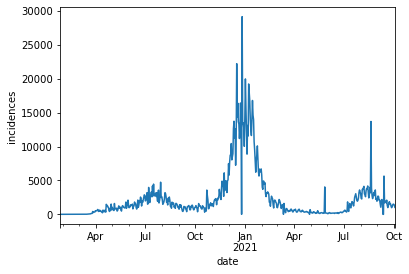

In [49]:
Q3 = Q3.set_index(['county','date'])
plotit = Q3.loc['Los Angeles']['incidences'].plot()
plotit.set_ylabel("incidences")

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

<AxesSubplot:title={'center':'Peak incidences for county'}, xlabel='county', ylabel='Incidences'>

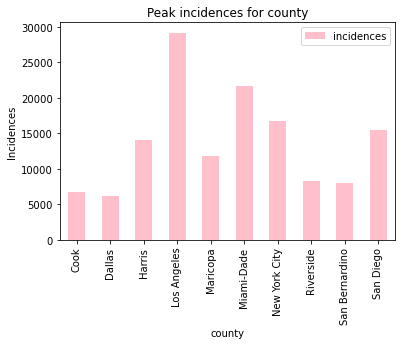

In [36]:
peaks_df = peaks_df.reset_index()
peaks_df = peaks_df.set_index('county')
bargraph = peaks_df[['incidences']].plot.bar(color=['pink'], title='Peak incidences for county')
bargraph.set_ylabel("Incidences")
bargraph